In [ ]:
//@version=5
indicator("4CCP + 6CBP Pattern Detector + 30minute bars (Asia/Manila)", overlay=true, max_boxes_count=500, max_lines_count=500, max_labels_count=500)

// ────────────── Restrict to 1-Minute Timeframe
is_1m = timeframe.period == "1"

// ────────────── Candle Data
o = open
h = high
l = low
c = close

// ────────────── Helpers for Manila time formatting
f_two(n) => n < 10 ? "0" + str.tostring(n) : str.tostring(n)

// return "HH:MM" for a given bar offset (use offset = 0 for current bar, 2 for bar_index[2], etc.)
manilaTimeStr(offset) =>
    // use built-in time[] timestamp and extract hour/minute in specified timezone
    hh = hour(time[offset], "Asia/Manila")
    mm = minute(time[offset], "Asia/Manila")
    f_two(hh) + ":" + f_two(mm)

// If you prefer HH:MM:SS, replace the return with:
// ss = second(time[offset], "Asia/Manila")
// f_two(hh) + ":" + f_two(mm) + ":" + f_two(ss)

// ────────────── Utility
isBull(c_, o_) => c_ > o_
isBear(c_, o_) => c_ < o_

// ────────────── Body coords (top, bottom, mid)
getBodyCoords(_o, _c) =>
    _top = math.max(_o, _c)
    _bot = math.min(_o, _c)
    _mid = (_top + _bot) / 2
    [_top, _bot, _mid]

// ────────────── 4CCP Patterns

// 4CCP-T1.1 Bullish
t1_1 = isBull(c[3], o[3]) and
       isBear(c[2], o[2]) and c[2] < o[3] and
       isBull(c[1], o[1]) and c[1] > o[2] and c[1] > c[3] and
       isBull(c, o) and c > c[1] and c > o[2] and c > c[3]

// 4CCP-T1.2 Bullish Type 2
t1_2 = isBull(c[3], o[3]) and
       isBear(c[2], o[2]) and c[2] < o[3] and
       isBull(c[1], o[1]) and c[1] > c[2] and c[1] < o[2] and
       isBull(c, o) and c > c[1] and c > o[2] and c > c[3]

// 4CCP-T2.1 Bearish
t2_1 = isBear(c[3], o[3]) and
       isBull(c[2], o[2]) and c[2] > o[3] and
       isBear(c[1], o[1]) and c[1] < o[2] and c[1] < c[3] and
       isBear(c, o) and c < c[1] and c < o[2] and c < c[3]

// 4CCP-T2.2 Bearish Type 2
t2_2 = isBear(c[3], o[3]) and
       isBull(c[2], o[2]) and c[2] > o[3] and
       isBear(c[1], o[1]) and c[1] < c[2] and c[1] > o[2] and
       isBear(c, o) and c < c[1] and c < o[2] and c < c[3]

// ────────────── Persistent arrays
var box[] boxes = array.new_box()
var line[] lines = array.new_line()
var label[] labs = array.new_label()

// ────────────── Draw helper (WITH Manila time stamp)
drawBoxAndLine(cond, baseBarOffset, extendBars, colorFill) =>
    if is_1m and cond
        [top, bot, mid] = getBodyCoords(open[baseBarOffset], close[baseBarOffset])
        x1 = bar_index - baseBarOffset
        x2 = x1 + extendBars

        bx = box.new(left = x1, right = x2, top = top, bottom = bot,
                     bgcolor = color.new(colorFill, 70), border_color = colorFill)
        ln = line.new(x1 = x1, y1 = mid, x2 = x2, y2 = mid,
                      color = colorFill, width = 1, style = line.style_dotted)

        array.push(boxes, bx)
        array.push(lines, ln)  

        // Manila timestamp for the pattern bar
        ts = manilaTimeStr(baseBarOffset)
        tLabel = label.new( x1, top,ts, style = label.style_label_down,textcolor = color.rgb(0, 0, 0),  color = color.new(colorFill, 100),size = size.small )
        array.push(labs, tLabel)

// ────────────── Draw all patterns
drawBoxAndLine(t1_1, 2, 5, color.rgb(0, 192, 255))
drawBoxAndLine(t1_2, 2, 5, color.rgb(0, 38, 255))
drawBoxAndLine(t2_1, 2, 5, color.rgb(255, 64, 64))
drawBoxAndLine(t2_2, 2, 5, color.rgb(255, 128, 0))

// ────────────────────────────
// Helper Function: Midpoint
get_mid(_o, _c) => (_o + _c) / 2

// ────────────────────────────
// 6CBP Logic
bear_bull1 = c[5] > o[5]
bear_bull2 = c[4] > o[4] and c[4] > c[5]
bear_bear3 = c[3] < o[3] and c[3] < o[4]
bear_bull4 = c[2] > c[3] and c[2] < o[3]
bear_bear5 = c[1] < o[2] and c[1] < c[3] and c[1] < o[4]
bear_bear6 = c < o and c < o[5] and c < c[1]

bearish_6CBP = bear_bull1 and bear_bull2 and bear_bear3 and bear_bull4 and bear_bear5 and bear_bear6

o4_bear = o[2]
c4_bear = c[2]
h4_bear = h[2]
l4_bear = l[2]
mid4_bear = get_mid(o4_bear, c4_bear)

// Bullish inverse
bull_bear1 = c[5] < o[5]
bull_bear2 = c[4] < o[4] and c[4] < c[5]
bull_bull3 = c[3] > o[3] and c[3] > o[4]
bull_bear4 = c[2] < c[3] and c[2] > o[3]
bull_bull5 = c[1] > o[2] and c[1] > c[3] and c[1] > o[4]
bull_bull6 = c > o and c > o[5] and c > c[1]

bullish_6CBP = bull_bear1 and bull_bear2 and bull_bull3 and bull_bear4 and bull_bull5 and bull_bull6

o4_bull = o[2]
c4_bull = c[2]
h4_bull = h[2]
l4_bull = l[2]
mid4_bull = get_mid(o4_bull, c4_bull)

// ────────────────────────────
// 🟥 Bearish 6CBP
if bearish_6CBP
    // Tiny diamond on top wick of 4th candle
    label.new(bar_index[2], h4_bear, "6CBP↓",  style=label.style_diamond, color=color.new(color.red, 0), textcolor=color.new(#000000, 0), size=size.tiny)

    // Rectangle for 4th candle’s body, extended 10 bars right
    box.new(left=bar_index[2], right=bar_index[2] + 10, top=math.max(o4_bear, c4_bear), bottom=math.min(o4_bear, c4_bear),bgcolor=color.new(color.red, 85),border_color=color.new(color.red, 0))

    // Midline for reference
    line.new(bar_index[2], mid4_bear, bar_index[2] + 10, mid4_bear,  color=color.new(color.red, 0), width=1 )

    // ✅ Manila timestamp for this 4th-bar (offset = 2)
    label.new(bar_index[2], h4_bear, manilaTimeStr(2), style = label.style_label_down,  textcolor = color.rgb(0, 0, 0), color = color.new(color.red, 100),  size = size.small)

// ────────────────────────────
// 🟩 Bullish 6CBP
if bullish_6CBP
    // Tiny diamond on bottom wick of 4th candle
    label.new(bar_index[2], l4_bull, text="6CBP↑",style=label.style_diamond,color=color.new(color.lime, 0),textcolor=color.new(#000000, 0), size=size.tiny )

    // Rectangle for 4th candle’s body, extended 10 bars right
    box.new(left=bar_index[2], right=bar_index[2] + 10, top=math.max(o4_bull, c4_bull),bottom=math.min(o4_bull, c4_bull), bgcolor=color.new(color.lime, 85),    border_color=color.new(color.lime, 0)  )

    // Midline for reference
    line.new(  bar_index[2],  mid4_bull,  bar_index[2] + 10,  mid4_bull, color=color.new(color.lime, 0), width=1  )

    // ✅ Manila timestamp for this 4th-bar (offset = 2)
    label.new(  bar_index[2], l4_bull, manilaTimeStr(2),style = label.style_label_up, textcolor = color.rgb(0, 0, 0),color = color.new(color.lime, 100),  size = size.small)

///////////////////////////////

// === INPUTS ===
showSeconds = input.bool(false, "Show seconds (HH:MM:SS)", inline="s")
labelBg = input.color(color.new(#363a45, 100), "Label background")
labelTxtColor = input.color(color.rgb(0, 0, 0), "Label text color")

// === HELPERS: lowercase day and month names ===
f_dayname(_d) =>_d == dayofweek.monday ? "mon" : _d == dayofweek.tuesday ? "tue" :_d == dayofweek.wednesday ? "wed" :_d == dayofweek.thursday ? "thu" :_d == dayofweek.friday ? "fri" : _d == dayofweek.saturday ? "sat" : "sun"

f_monthname(_m) => _m == 1 ? "jan" : _m == 2 ? "feb" :_m == 3 ? "mar" :_m == 4 ? "apr" : _m == 5 ? "may" : _m == 6 ? "jun" : _m == 7 ? "jul" :_m == 8 ? "aug" : _m == 9 ? "sep" : _m == 10 ? "oct" : _m == 11 ? "nov" :  "dec"

// === TIME CONVERSION TO ASIA/MANILA (UTC+8) ===
t_now_manila = timenow + (13 * 60 * 60 * 1000)  // correct offset is +8 hours

// Extract components in Asia/Manila timezone
hh = hour(t_now_manila)
min_ = minute(t_now_manila)
sec_ = second(t_now_manila)
dofw = dayofweek(t_now_manila)
mon = month(t_now_manila)
dy = dayofmonth(t_now_manila)
yr = year(t_now_manila)

// Format helpers
ff_two(n) => n < 10 ? "0" + str.tostring(n) : str.tostring(n)

// Format "HH:MM" or "HH:MM:SS"
timeStr = showSeconds ? ff_two(hh) + ":" + ff_two(min_) + ":" + ff_two(sec_) : ff_two(hh) + ":" + ff_two(min_) + " utc8"
// Format "mon/oct 27/2025"
dateStr = f_dayname(dofw) + "/" + f_monthname(mon) + " " + ff_two(dy) + "/" + str.tostring(yr)

lblText = timeStr + "   " + "\n          " + dateStr

// === DRAW LABEL ON MOST RECENT CLOSE ===
var label lbl = na

if barstate.islast
    if na(lbl)
        lbl := label.new( bar_index - 5 , close, lblText,   xloc=xloc.bar_index, yloc=yloc.price, style=label.style_label_left,   color=labelBg, textcolor=labelTxtColor, size=size.small )
    else
        label.set_xy(lbl, bar_index, close)
        label.set_text(lbl, lblText)
        label.set_color(lbl, labelBg)
        label.set_textcolor(lbl, labelTxtColor)
        label.set_size(lbl, size.small)

 //30minute bar candles Logic\




// ---- SETTINGS ----
len    = input.int(30, "Number of CLOSED 30m candles", minval=1)
offset = input.int(5, "Offset from right edge (bars)")
spacing = 3    // horizontal footprint per 30m candle (2 body + 1 gap)

// ---- COLOR SETTINGS ----
bullColor = input.color(color.new(#dbdbdb, 0), "Bull Candle Color")
bearColor = input.color(color.new(#2e2e2e, 0), "Bear Candle Color")
wickColor = input.color(#2e2e2e, "Wick Color")
borderCol = input.color(#2e2e2e, "Border Color")

// ---- GET 30m CLOSED series ----   
[o30, h30, l30, c30] = request.security(syminfo.tickerid, "30", [open, high, low, close], barmerge.gaps_on)

// ---- detect 30m boundary ----
isNew30Boundary = ta.change(time("30"))

// ---- Buffers for closed candles ----
var float[] bufO = array.new_float(len, na)
var float[] bufH = array.new_float(len, na)
var float[] bufL = array.new_float(len, na)
var float[] bufC = array.new_float(len, na)

// Maintain buffer if len changed
if array.size(bufO) != len
    bufO := array.new_float(len, na)
    bufH := array.new_float(len, na)
    bufL := array.new_float(len, na)
    bufC := array.new_float(len, na)

// ---- Store CLOSED 30m candle on new boundary ----
if isNew30Boundary
    closedO = o30[1]
    closedH = h30[1]
    closedL = l30[1]
    closedC = c30[1]

    if not na(closedO) and not na(closedC)
        array.unshift(bufO, closedO)
        array.unshift(bufH, closedH)
        array.unshift(bufL, closedL)
        array.unshift(bufC, closedC)

        if array.size(bufO) > len
            array.pop(bufO)
            array.pop(bufH)
            array.pop(bufL)
            array.pop(bufC)

// ---- Historical Prefill ----
var bool didPrefill = false
if not didPrefill
    maxScanBars = 2000
    var float[] tO = array.new_float()
    var float[] tH = array.new_float()
    var float[] tL = array.new_float()
    var float[] tC = array.new_float()

    for i = 1 to maxScanBars
        if bar_index - i < 0
            break
        if time("30")[i] != time("30")[i+1]
            co = o30[i+1]
            ch = h30[i+1]
            cl = l30[i+1]
            cc = c30[i+1]
            if not na(co) and not na(cc)
                array.push(tO, co)
                array.push(tH, ch)
                array.push(tL, cl)
                array.push(tC, cc)
        if array.size(tO) >= len
            break

    if array.size(tO) > 0
        bufO := array.new_float()
        bufH := array.new_float()
        bufL := array.new_float()
        bufC := array.new_float()
        for j = array.size(tO) - 1 to 0 by -1
            array.push(bufO, array.get(tO, j))
            array.push(bufH, array.get(tH, j))
            array.push(bufL, array.get(tL, j))
            array.push(bufC, array.get(tC, j))
        while array.size(bufO) < len
            array.push(bufO, na)
            array.push(bufH, na)
            array.push(bufL, na)
            array.push(bufC, na)
    didPrefill := true

// ---- LIVE 30m candle on lower TF (manual accumulation) ----
tf_sec = 30 * 60  // 30 minutes in seconds
curr30_open_time = math.floor(time / 1000 / tf_sec) * tf_sec * 1000  // start time of current 30m candle in ms

var float liveO = na
var float liveH = na
var float liveL = na
var float liveC = na

if na(liveO) or time == curr30_open_time
    liveO := open
    liveH := high
    liveL := low

liveH := math.max(liveH, high)
liveL := math.min(liveL, low)
liveC := close

// ---- DRAW ----
var box[] bodies = array.new_box()
var line[] wicks = array.new_line()

if barstate.isfirst
    // +1 slot for LIVE candle
    for i = 0 to len
        array.push(bodies, na)
        array.push(wicks, na)

// ---- RENDER ----
anchor = bar_index
for i = 0 to len
    _o = i == 0 ? liveO : array.get(bufO, i - 1)
    _h = i == 0 ? liveH : array.get(bufH, i - 1)
    _l = i == 0 ? liveL : array.get(bufL, i - 1)
    _c = i == 0 ? liveC : array.get(bufC, i - 1)

    if na(_o) or na(_c)
        continue

    hi = math.max(_o, _c)
    lo = math.min(_o, _c)

    xL = anchor + offset + (len - i + 1) * spacing
    xR = xL + 2
    xM = xL + 1

    _bg = _c >= _o ? bullColor : bearColor

    // body
    body = array.get(bodies, i)
    if na(body)
        body := box.new(xL, hi, xR, lo, border_color=borderCol, bgcolor=_bg)
        array.set(bodies, i, body)
    else
        box.set_left(body, xL)
        box.set_right(body, xR)
        box.set_top(body, hi)
        box.set_bottom(body, lo)
        box.set_bgcolor(body, _bg)

    // wick
    wick = array.get(wicks, i)
    if na(wick)
        wick := line.new(xM, _h, xM, _l, width=1, color=wickColor)
        array.set(wicks, i, wick)
    else
        line.set_x1(wick, xM)
        line.set_x2(wick, xM)
        line.set_y1(wick, _h)
        line.set_y2(wick, _l)


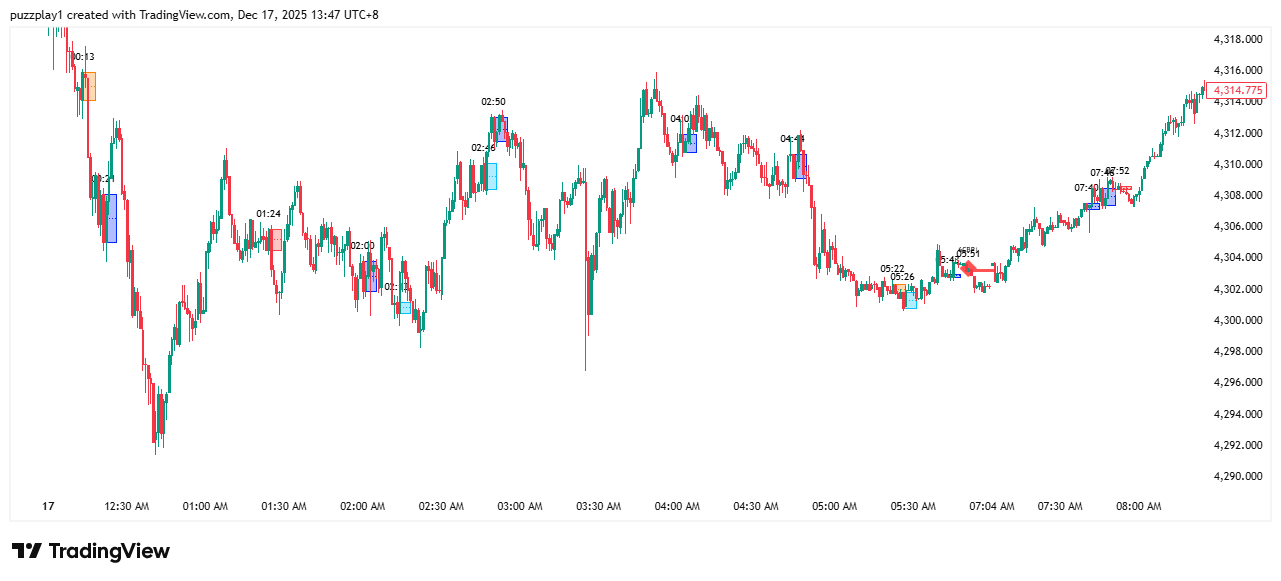